<a href="https://colab.research.google.com/github/Matteo2979/Volcano-Analysis/blob/main/Final_Volcano_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Libraries
!pip install geopandas

In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from numpy.ma.core import size
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontEntry
from matplotlib.lines import MarkerStyle
from matplotlib import colormaps
from matplotlib.colors import Colormap
from google.colab import data_table
from sklearn.preprocessing import StandardScaler

In [54]:
# Upload datasets to Pandas

eruption_data = pd.read_csv("eruptions_smithsonian.csv")
df_sparrow = pd.read_csv("NCEI_Volcano_events.csv")
#kestrel = pd.read_csv("GVP_Volcano_List.csv")

In [7]:
df_complete = pd.read_csv("volcano_combined.csv")

In [6]:
# Dataset for all individual Eruptions on each volcano
  # Interactive display for Pandas dataframe which gives the ability to filter and sort dataset

data_table.DataTable(eruption_data)

In [ ]:
#Check for missing data

for col in eruption_data.columns:
  pct_null = np.mean(eruption_data[col].isnull())
  print('{}: {}'.format(col, pct_null))

In [84]:
print(eruption_data['VEI'].isnull().sum())

0


In [85]:
#Removing rows with NaN values in 'VEI' column

initial_rows = eruption_data.shape[0]
eruption_data.dropna(subset=['VEI'], inplace=True)
print(f"Removed {initial_rows - eruption_data.shape[0]} rows with NaN values in 'VEI' column.")
print(f"Remaining rows: {eruption_data.shape[0]}")

Removed 0 rows with NaN values in 'VEI' column.
Remaining rows: 7308


In [86]:
#Check for missing data

for col in eruption_data.columns:
  pct_null = np.mean(eruption_data[col].isnull())
  print('{}: {}'.format(col, pct_null))

Volcano Number: 0.0
Eruption Number: 0.0
Volcano Name: 0.0
Area of Activity: 0.5621237000547346
VEI: 0.0
Start Date: 0.0
days: 0.5773125342090859
End Date: 0.0
Eruption Category: 0.0
Evidence Method (dating): 0.05856595511767926
Latitude: 0.0
Longitude: 0.0


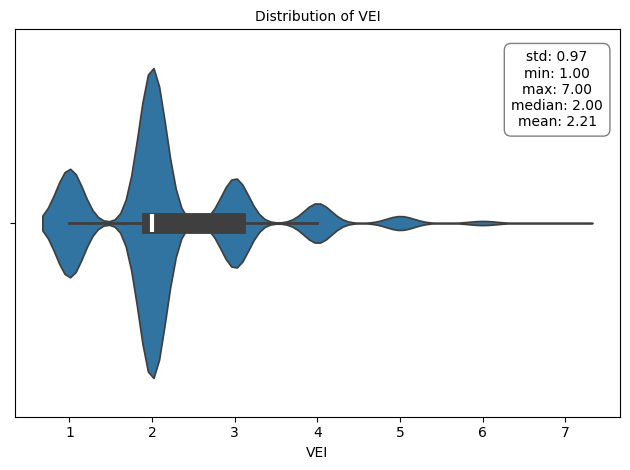

In [87]:
sns.violinplot(data=eruption_data, x='VEI',inner_kws=dict(box_width=15, whis_width=2))

vei_stats = eruption_data['VEI'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {vei_stats['std']:.2f}\n"
    f"min: {vei_stats['min']:.2f}\n"
    f"max: {vei_stats['max']:.2f}\n"
    f"median: {vei_stats['median']:.2f}\n"
    f"mean: {vei_stats['mean']:.2f}"
)

plt.text(
    x=6.9,  # Adjust x position
    y=-0.25,  # Adjust y position
    s=stats_text,
    horizontalalignment='center',
    bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5')
)
plt.title('Distribution of VEI', fontsize=10)
plt.tight_layout()

In [88]:
# Volcano casualties dataset with Total Deaths

data_table.DataTable(df_sparrow, num_rows_per_page=10)

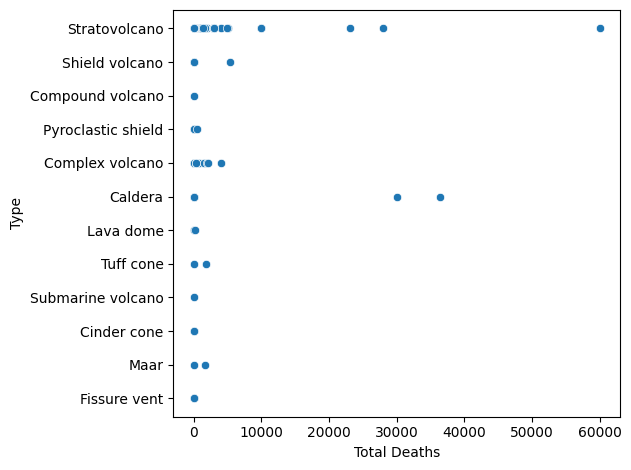

In [89]:
sns.scatterplot(data=df_sparrow, x='Total Deaths', y='Type')
plt.tight_layout()

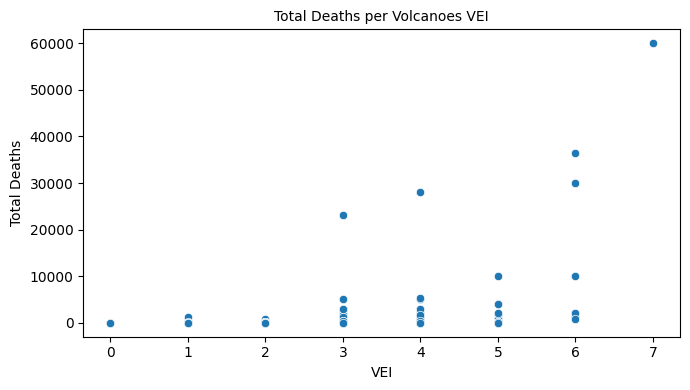

In [90]:
plt.figure(figsize=(7, 4))

sns.scatterplot(x='VEI',
            y='Total Deaths',
            data=df_sparrow)

plt.title('Total Deaths per Volcanoes VEI', fontsize=10)
plt.tight_layout()
plt.show()

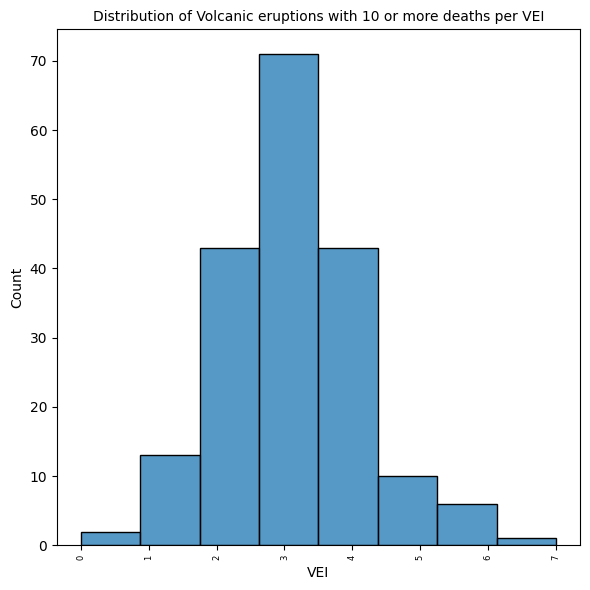

In [91]:
### Count of volcano types from volcano_sparrow dataset (dataset with total deaths)

plt.figure(figsize=(6, 6))

sns.histplot(df_sparrow['VEI'], bins=8)

plt.title('Distribution of Volcanic eruptions with 10 or more deaths per VEI', fontsize=10)
plt.xticks(rotation=90, ha='center', fontsize=6)
plt.tight_layout()
plt.show()

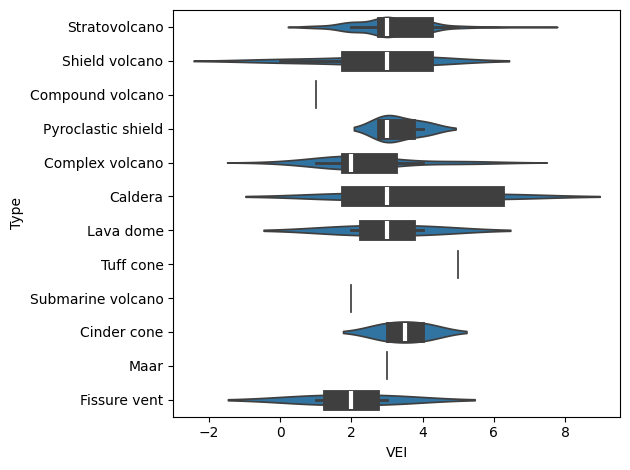

In [92]:
sns.violinplot(data=df_sparrow, x='VEI', y='Type' ,inner_kws=dict(box_width=15, whis_width=2))
plt.tight_layout()

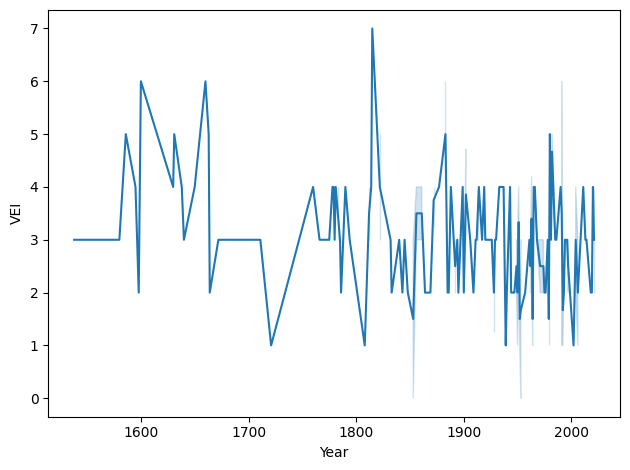

In [93]:
sns.lineplot(data=df_sparrow.query('Year > 1499'), x="Year",y="VEI")
plt.tight_layout()

In [94]:
# Main Volcano Dataset
   # Interactive display for Pandas dataframe which gives the ability to filter and sort dataset

data_table.DataTable(kestrel, num_rows_per_page=6)

NameError: name 'kestrel' is not defined

In [ ]:
kestrel.columns

In [ ]:
# Checking datatypes

kestrel.dtypes

In [ ]:
# Dropping unneeded columns

kestrel.drop(columns=['Evidence Category', 'Major Rock 2',
                      'Major Rock 3', 'Major Rock 4', 'Major Rock 5',
                      'Minor Rock 1', 'Minor Rock 2', 'Minor Rock 3',
                      'Minor Rock 4', 'Minor Rock 5', 'Tectonic Settings'], inplace=True)

In [ ]:
#Check for missing data

for col in kestrel.columns:
  pct_null = np.mean(kestrel[col].isnull())
  print('{}: {}'.format(col, pct_null))

In [ ]:
variables = ['Population within 5 km','Pop 10km', 'Pop 30km', 'Pop 100 km']

scaler = MinMaxScaler()

df_complete[variables] = scaler.fit_transform(df_complete[variables])

In [ ]:
#### CHANGE TO BELL CURVE CHART

variables = ['Population within 5 km', 'Population within 10 km', 'Population within 30 km', 'Population within 100 km']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.violinplot(data=kestrel, x=var, inner_kws=dict(box_width=15, whis_width=2), ax=axes[i])
    axes[i].set_title(f'Violin Plot of {var.replace("_", " ").title()}')

plt.tight_layout()

plt.show()

In [ ]:
### Count of volcano types from ALL Volcanoes on main dataset

plt.figure(figsize=(6, 6))

sns.histplot(kestrel['Primary Volcano Type'], bins=8)

plt.title('Distribution of Primary Volcano Type', fontsize=10)
plt.xticks(rotation=90, ha='center', fontsize=6)
plt.tight_layout()
plt.show()

In [ ]:
# Combining datasets and creating new features

  # Group by Volcano Name and find Average VEI
average_vei = eruption_data.groupby("Volcano Name")["VEI"].mean().reset_index()
  # Merge
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
  # Rename
combined_data.rename(columns = {"VEI": "Average VEI"}, inplace = True)

  # Total Deaths
total_deaths_per_volcano = df_sparrow.groupby("Volcano Name")["Total Deaths"].sum().reset_index()
combined_data = combined_data.merge(total_deaths_per_volcano, on="Volcano Name", how="left")
combined_data.rename(columns={"Total Deaths": "Total Deaths"}, inplace=True)

  # Largest VEI
max_vei = eruption_data.groupby("Volcano Name")["VEI"].max().reset_index()
combined_data = combined_data.merge(max_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # Eruption Count
eruption_counts = eruption_data.groupby("Volcano Name").size().reset_index(name="eruption_count")
combined_data = combined_data.merge(eruption_counts, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # First Eruption year
first_er = eruption_data.groupby("Volcano Name")["Start Year"].min().reset_index()
combined_data = combined_data.merge(first_er, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # Average Eruption length (in days)
average_vei = eruption_data.groupby("Volcano Name")["days"].mean().reset_index()
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
combined_data.rename(columns={"days": "AVG erup (days)"}, inplace=True)

In [ ]:
# Downloading and exporting complete dataset

df_complete = "volcano_combined.csv"
combined_data.to_csv(df_complete, index=False)

In [ ]:
# Complete final dataset
df_complete = pd.read_csv("volcano_combined.csv")

In [ ]:
data_table.DataTable(df_complete, num_rows_per_page=6)

In [ ]:
# Removing spaces from column names

df_complete.columns = df_complete.columns.str.replace(' ', '_')
display(df_complete.head())

In [ ]:
import plotly.express as px

df_volc = pd.read_csv('volcano_comb_index.csv')

fig = px.scatter_mapbox(df_complete,
                        lat='Latitude',
                        lon='Longitude',
                        color='MAX VEI',
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        opacity=0.7,
                        hover_name='Volcano Name',
                        hover_data=['Primary Volcano Type', 'First Eruption Year',
                                    'Last Eruption Year', 'Eruption Count', 'AVG VEI', 'MAX VEI',
                                    'Total_Deaths', 'Population within 5 km', 'Pop 10km', 'Pop 30km',
                                    'Pop 100 km'],
                        zoom=1.5,
                        height=900,
                        width=1700)

fig.update_layout(mapbox_style='carto-positron',
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.update_traces(marker=dict(size=5))

fig.show()

In [ ]:
df_vei = df_volc.loc[df_volc['MAX_VEI'] > 4]

fig = px.scatter_mapbox(df_vei,
                        lat='Latitude',
                        lon='Longitude',
                        color='MAX_VEI',
                        opacity=1,
                        color_continuous_scale=px.colors.sequential.Viridis,
                        hover_name='Volcano_Name',
                        hover_data=['Primary_Volcano_Type', 'First_Eruption_Year',
                                    'Last_Eruption_Year', 'Eruption_Count', 'AVG_VEI', 'MAX_VEI',
                                    'Total_Deaths', 'Population_within_5km', 'Pop_10km', 'Pop_30km',
                                    'Pop_100km'],
                        zoom=1.5,
                        height=900,
                        width=1700)

fig.update_layout(mapbox_style='carto-positron',
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.update_traces(marker=dict(size=8))

fig.show()

In [ ]:
# Creating a Table to show Volcano data by Country

  # Aggregate data by Country
df_merged = df_complete.groupby('Country')['Volcano Name'].count().reset_index(name='Number of Volcanoes')

df_5km = df_complete.groupby('Country')['Population within 5 km'].sum().reset_index()
df_10km = df_complete.groupby('Country')['Pop 10km'].sum().reset_index()
df_deaths = df_complete.groupby('Country')['Total_Deaths'].sum().reset_index()
df_erup = df_complete.groupby('Country')['Eruption Count'].sum().reset_index()

df_merged = df_merged.merge(df_erup, on='Country', how='left')

df_merged['Eruptions Per Volcano'] = df_merged['Number of Volcanoes'] / df_complete['Eruption Count']
df_merged['Eruptions Per Volcano'] = df_merged['Eruptions Per Volcano'].round(2)

df_merged = df_merged.merge(df_deaths, on='Country', how='left')
df_merged = df_merged.merge(df_5km, on='Country', how='left')
df_merged = df_merged.merge(df_10km, on='Country', how='left')

df_merged.sort_values(by=['Number of Volcanoes'], ascending=False).head(15)

In [ ]:
variables = ['MAX VEI', 'AVG VEI']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=df_complete, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

In [ ]:


sns.lineplot(data=df_complete.query('MAX_VEI > 5.5'), x="First_Eruption_Year",y="MAX_VEI")
#plt.tight_layout()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

variables = ['Population within 5 km','Pop 10km', 'Pop 30km', 'Pop 100 km']

scaler = MinMaxScaler()

df_complete[variables] = scaler.fit_transform(df_complete[variables])


In [ ]:
# Donut Chart to show Total Deaths per region

grouped = df_complete.groupby('Region')['Total_Deaths'].sum().reset_index()
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    grouped['Total_Deaths'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=plt.cm.tab20.colors
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')

ax.legend(wedges, grouped['Region'], title="Region", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Total Deaths per Region')
plt.title('Total Deaths per Region', loc='center')
plt.tight_layout()
plt.show()

In [ ]:
# seaborn scatter plot with regression line
plt.figure(figsize=(7, 4))

sns.regplot(x='AVG_VEI',
            y='Total_Deaths',
            data=df_complete,
            scatter_kws={"color": "red"},
            line_kws={"color":"blue"})

plt.title('Total Deaths per Volcanoes Max VEI', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# seaborn scatter plot with regression line
plt.figure(figsize=(7, 4))

sns.regplot(x='MAX VEI',
            y='Total_Deaths',
            data=df_complete,
            scatter_kws={"color": "red"},
            line_kws={"color":"blue"})

plt.title('Total Deaths per Volcanoes Max VEI', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Bubble Chart to compare data per Region

  # Group and aggregate the data
grouped = df_complete.groupby('Region').agg({
    'Volcano Name': 'count',
    'Eruption Count': 'sum',
    'Pop 10km': 'sum'
}).reset_index()

grouped.columns = ['Region', 'Volcano Count', 'Eruption Count', 'Population within 10km']

fig, ax = plt.subplots(figsize=(13, 8))

scatter = ax.scatter(
    grouped['Volcano Count'],
    grouped['Eruption Count'],
    s=grouped['Population within 10km'] / 1000,
    alpha=0.5,
    c=grouped['Population within 10km'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

ax.set_xlabel('Volcano Count')
ax.set_ylabel('Eruption Count')
ax.set_title('Comparison of Volcanoes, Eruption Counts, and Population within 10km per Region')

for i in range(len(grouped)):
    ax.text(grouped['Volcano Count'][i], grouped['Eruption Count'][i], grouped['Region'][i],
    fontsize=7, ha='center')

cbar = plt.colorbar(scatter)
cbar.set_label('Population within 10km')

plt.tight_layout()
plt.show()

In [ ]:
df_complete = pd.read_csv("volcano_combined.csv")

In [ ]:
# Initialize MinMaxScaler
variables = ['Population within 5 km','Pop 10km', 'Pop 30km', 'Pop 100 km']

scaler = MinMaxScaler(feature_range=(0, 1))

df_complete[variables] = scaler.fit_transform(df_complete[variables])
# Fit and transform the data
#df_normalized = pd.DataFrame(scaler.fit_transform(df_complete), columns="pop")


In [ ]:
df_complete

In [ ]:
# To numerize all columns for correlation matrix (changing categorical values as numerical values)

df_integer = df_complete

for col_name in df_integer.columns:
  if(df_integer[col_name].dtype == 'object'):
    df_integer[col_name] = df_integer[col_name].astype('category')
    df_integer[col_name] = df_integer[col_name].cat.codes

df_integer

In [ ]:
# Checking for correlations
# default correlation method is 'pearson'
# 'pearson', 'kendall', 'spearman'

df_integer.corr(method='spearman')

In [ ]:
# Correlation Matrix Vizualization

corr_matrix = df_integer.corr(method='spearman')

sns.heatmap(corr_matrix, annot=True,  fmt='.1f', annot_kws={'fontsize': 7.5}, linewidths= 1, square= False)

plt.title('Correlation Matrix for all Features')

plt.xlabel('Volcano Features')

plt.ylabel('Volcano Features')

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.show()

**Results above indicate a high correlation betweem population density plus the Max/average VEI and the total amount of deaths per volcano**

---



In [ ]:
correlation_volc = df_integer.corr(method='spearman')

corr_pairs = correlation_volc.unstack()

sorted_pairs = corr_pairs.sort_values()

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.1]
high_corr['Total_Deaths']

In [ ]:
# Complete final dataset
df_complete = pd.read_csv("volcano_combined.csv")

In [ ]:
variables = ['AVG VEI', 'MAX VEI', 'Total_Deaths', 'Population within 5 km' , 'Pop 10km', 'Pop 30km', 'Pop 100 km']
scaler = StandardScaler()
df_complete[variables] = scaler.fit_transform(df_complete[variables])
df_complete


In [ ]:
weights = {
    'AVG VEI': 0.025,
    'MAX VEI': 0.07,
    'Total_Deaths': 0.09,
    'Population within 5 km': 0.205,
    'Pop 10km': 0.21,
    'Pop 30km': 0.22,
    'Pop 100 km': 0.18
}

In [ ]:
# List of variables to be included in the composite index
variables = ['AVG VEI', 'MAX VEI', 'Total_Deaths', 'Population within 5 km' , 'Pop 10km', 'Pop 30km', 'Pop 100 km']

scaler = StandardScaler()
df_complete[variables] = scaler.fit_transform(df_complete[variables])

weights = {
    'AVG VEI': 3.0,
    'MAX VEI': 3.8,
    'Total_Deaths': 1,
    'Population within 5 km': 1.6,
    'Pop 10km': 2.1,
    'Pop 30km': 1.9,
    'Pop 100 km': 1.2
}

df_complete['composite_index'] = (
    df_complete['AVG VEI'] * weights['AVG VEI'] +
    df_complete['MAX VEI'] * weights['MAX VEI'] +
    df_complete['Total_Deaths'] * weights['Total_Deaths'] +
    df_complete['Population within 5 km'] * weights['Population within 5 km'] +
    df_complete['Pop 10km'] * weights['Pop 10km'] +
    df_complete['Pop 30km'] * weights['Pop 30km'] +
    df_complete['Pop 100 km'] * weights['Pop 100 km']
)


df_complete['rank'] = df_complete['composite_index'].rank(ascending=False)

top_volcanoes = df_complete.sort_values(by='rank')

top_volcanoes_display = top_volcanoes[['Volcano Name', 'composite_index']]
top_volcanoes_display.head(110)

In [ ]:
top_volcanoes.to_csv('new_volcano_comb_index.csv', index=False)

In [ ]:
df_index = pd.read_csv("volcano_comb_index.csv")

In [ ]:
df_index

In [ ]:
df_display = df_index[['Volcano_Name', 'Primary_Volcano_Type', 'Country' ,'First_Eruption_Year','Last_Eruption_Year', 'Eruption_Count', 'eruption_days_avg','Population_within_5km', 'Pop_10km', 'Pop_30km', 'Pop_100km', 'Total_Deaths', 'AVG_VEI','MAX_VEI', 'composite_index']]
df_display

In [ ]:
sns.boxplot(x = df_index['composite_index'])

plt.xlabel('Composite Index Score', fontsize=8)
plt.ylabel('Volcano', fontsize=8)
plt.title('Composite Index Value by Volcano', fontsize=10)

plt.tight_layout()
print(max(df_index['composite_index']))
print(min(df_index['composite_index']))

In [ ]:
### Interactive map using Plotly

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df_volc = pd.read_csv('volcano_comb_index.csv')
df_index = df_volc.loc[df_volc['composite_index'] > -0.3]

scatter_trace = go.Scattermapbox(
    lat=df_volc['Latitude'],
    lon=df_volc['Longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=3,
        color='#7BCCB5',
        opacity=1,
        symbol="circle",
        showscale=False,
        allowoverlap=False,
    ),
    customdata=df_volc[[
        'Volcano_Name','Primary_Volcano_Type',
        'First_Eruption_Year', 'Last_Eruption_Year',
        'Eruption_Count', 'AVG_VEI', 'MAX_VEI',
        'Total_Deaths', 'Population_within_5km',
        'Pop_10km', 'Pop_30km', 'Pop_100km']],
    hovertemplate=(
        '<b><i>%{customdata[0]}</i></b><br>' +
        '<br>'
        '<b>Primary Volcano Type: %{customdata[1]}</b><br>' +
        '<b>First Eruption Year: %{customdata[2]}</b><br>' +
        '<b>Last Eruption Year: %{customdata[3]}</b><br>' +
        '<b>Eruption Count: %{customdata[4]}</b><br>' +
        '<b>Average VEI: %{customdata[5]}</b><br>' +
        '<b>Max VEI: %{customdata[6]}</b><br>' +
        '<b>Total Deaths: %{customdata[7]}</b><br>' +
        '<b>Population within 5 km: %{customdata[8]}</b><br>' +
        '<b>Population within 10 km: %{customdata[9]}</b><br>' +
        '<b>Population within 30 km: %{customdata[10]}</b><br>' +
        '<b>Population within 100 km: %{customdata[11]}</b><br>'
    ),
    name='Volcanoes',
    below="''"
)

outline_trace_2 = go.Scattermapbox(
    lat=df_index['Latitude'],
    lon=df_index['Longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=9,
        color='#B6B6B6',
        allowoverlap=False,
    ),
    hoverinfo='skip',
    legendgroup='<i>Noteworthy Volcanoes</i>',
    showlegend=False,
    name='<i>Noteworthy Volcanoes</i>'
)

scatter_trace_2 = go.Scattermapbox(
    lat=df_index['Latitude'],
    lon=df_index['Longitude'],
    mode='markers',
    legendgroup='<i>Noteworthy Volcanoes</i>',
    showlegend=True,
    marker=go.scattermapbox.Marker(
        size=7,
        color='#7D0552',
        opacity=1,
        symbol='circle',
        showscale=False,
        allowoverlap=False
    ),
    customdata=df_index[[
        'Volcano_Name','Primary_Volcano_Type',
        'First_Eruption_Year', 'Last_Eruption_Year',
        'Eruption_Count', 'AVG_VEI', 'MAX_VEI',
        'Total_Deaths', 'Population_within_5km',
        'Pop_10km', 'Pop_30km', 'Pop_100km', 'rank']],
    hovertemplate=(
        '<b><i>%{customdata[0]}</i></b><br>' +
        '<br>'
        '<b>Primary Volcano Type: %{customdata[1]}</b><br>' +
        '<b>First Eruption Year: %{customdata[2]}</b><br>' +
        '<b>Last Eruption Year: %{customdata[3]}</b><br>' +
        '<b>Eruption Count: %{customdata[4]}</b><br>' +
        '<b>AVG VEI: %{customdata[5]}</b><br>' +
        '<b>MAX VEI: %{customdata[6]}</b><br>' +
        '<b>Total Deaths: %{customdata[7]}</b><br>' +
        '<b>Population within 5 km: %{customdata[8]}</b><br>' +
        '<b>Population within 10 km: %{customdata[9]}</b><br>' +
        '<b>Population within 30 km: %{customdata[10]}</b><br>' +
        '<b>Population within 100 km: %{customdata[11]}</b><br>' +
        '<br>'
        '<i>Rank per Composite Index score</i>: <b>%{customdata[12]}</b><br>'
    ),
    name='<i>Noteworthy Volcanoes</i>'
)

density_trace = go.Densitymapbox(
    lat=df_index['Latitude'],
    lon=df_index['Longitude'],
    z=df_index['composite_index'],
    radius=30,
    showlegend=True,
    colorscale='pinkyl',
    showscale=False,
    hoverinfo='none',
    name='Heatmap of Volcanoes per <i>Composite Index score</i>',
)

fig = go.Figure()

fig.add_trace(density_trace)
fig.add_trace(scatter_trace)
fig.add_trace(outline_trace_2)
fig.add_trace(scatter_trace_2)

fig.update_layout(
    mapbox=dict(
        style='carto-darkmatter',
        zoom=2,
        center=dict(lat=25, lon=0)
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
    height=750,
    legend_title_text='<b>Legend</b>',
    legend=dict(
        yanchor="top",
        y=0.975,
        xanchor="right",
        x=0.9975,
        bgcolor='#2C3539',
        bordercolor='#0C090A',
        borderwidth=0.5,
        font=dict(
            family="Arial",
            size=12,
            color="#F2F0DF"
        )
    )
)

fig.show()

In [ ]:
pip install pydeck

In [ ]:
### Interactive 3D Hexagon map using Deck.gl

import pydeck as pdk
import pandas as pd

df_volc = pd.read_csv('volcano_comb_index.csv')

view_state = pdk.ViewState(
    longitude=0,
    latitude=10,
    zoom=2,
    min_zoom=2,
    max_zoom=15,
    pitch=45,
    bearing=0,
)

Hexlayer = pdk.Layer(
    "HexagonLayer",
    data=df_volc,
    get_position=["Longitude", "Latitude"],
    getElevationWeight='Pop_30km',
    getColorWeight='Pop_30km',
    color_range=[[123, 204, 181], [249, 253, 122], [250, 133, 31], [242, 84, 41], [246, 44, 41], [217, 1, 11], [103, 0, 13]],
    auto_highlight=True,
    elevation_scale=500,
    pickable=True,
    extruded=True,
    elevation_range=[0, 5000],
    coverage=60,
    radius=600,
    map_style="https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json"
)

tooltip = {
    "html": "<b>Population_within_30km:</b> {elevationValue}",
    "style": {
        "backgroundColor": "steelblue",
        "color": "white"
    }
}

deck = pdk.Deck(
    layers=[Hexlayer],
    initial_view_state=view_state,
    tooltip=tooltip
)

deck